In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [2]:
def plot_data(beta1=0, beta0=0):
    """
    Строит график точек и линейную модель y = beta0 + beta1 * x.
    beta0 - свободный коэффициент (intercept) - по умолчанию равен 0,
    beta1 - коэффициент при признаке (slope). Если равен 0, то прямая не строится.
    """
    plt.xlabel('zp')
    plt.ylabel('ks')
    plt.scatter(x, y)
    
    if beta1 != 0:
        plt.plot(x, beta0 + beta1 * x, color='green')
    
    plt.show()

# Многомерный статистический анализ. Линейная регрессия.

### Задание 1

*Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):*

*zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],*

*ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].*

*Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.*

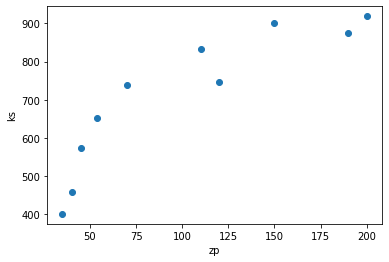

In [3]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float32)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float32)
n = len(x)

plot_data()

#### Пример 1

*Посчитать коэффициенты линейной регрессии с использованием intercept.*

Построим линейную регрессию вида

$$y = \beta_0 + \beta_1 x.$$

Найдем коэффициенты $\beta_0, \beta_1$ по формулам:

$$\beta_1 = \frac{n \sum_{i=1}^n x_i y_i - \sum_{i=1}^n x_i \sum_{i=1}^n y_i}{n \sum_{i=1}^n x^2_i - \left( \sum_{i=1}^n x_i \right)^2} \approx 2.62,$$

$$\beta_0 = \frac{1}{n} \sum_{i=1}^n y_i - \beta_1 \left( \frac{1}{n} \sum_{i=1}^n x_i \right) \approx 444.177,$$

где $x_i$ - величина заработной платы заемщиков (zp), $y_i$ - значения их поведенческого кредитного скоринга (ks), $n = 10$.

Посчитаем коэффициенты также с использованием матричного метода. В этом случае матрицы имеют вид:

$$\begin{pmatrix}
    y_{1} \\
    y_{2} \\
    \dots \\
    y_{n}
\end{pmatrix} = \begin{pmatrix}
    1 & x_{1} \\
    1 & x_{2} \\
    \dots & \dots \\
    1 & x_{n}
\end{pmatrix} \begin{pmatrix}
    \beta_{0} \\
    \beta_{1}
\end{pmatrix}.$$

Вектор коэффициентов $B = (\beta_0, \beta_1)$ вычисляется по формуле

$$B = (X^T X)^{-1} X^T Y.$$

**Ответ:** $y = 444.177 + 2.62 x.$

beta0 = 444.17737773979707
beta1 = 2.6205388824027653

Матричный способ
[[444.17735732]
 [  2.62053888]]


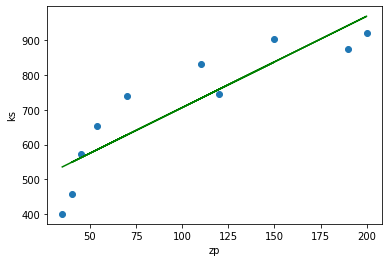

In [4]:
# С использованием формул
beta1 = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x * x) - np.power(np.sum(x), 2))
beta0 = np.mean(y) - beta1 * np.mean(x)

print(f'beta0 = {beta0}\nbeta1 = {beta1}\n')

# Матричный метод
X = x.reshape((n, 1))
Y = y.reshape((n, 1))
X = np.hstack([np.ones((n, 1)), X])
B = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))

print('Матричный способ')
print(B)

# Графики
plot_data(beta1, beta0)

#### Пример 2

*Посчитать коэффициенты линейной регрессии без использования intercept.*

Построим линейную регрессию вида

$$y = \beta_1 x.$$

Найдем коэффициенты $\beta_1$ по формулам:

$$\beta_1 = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x^2_i} \approx 5.889,$$

где $x_i$ - величина заработной платы заемщиков (zp), $y_i$ - значения их поведенческого кредитного скоринга (ks), $n = 10$.

Посчитаем коэффициенты также с использованием матричного метода. В этом случае матрицы имеют вид:

$$\begin{pmatrix}
    y_{1} \\
    y_{2} \\
    \dots \\
    y_{n}
\end{pmatrix} = \begin{pmatrix}
    x_{1} \\
    x_{2} \\
    \dots \\
    x_{n}
\end{pmatrix} \begin{pmatrix}
    \beta_{1}
\end{pmatrix}.$$

Вектор коэффициентов $B = (\beta_1)$ вычисляется по формуле

$$B = (X^T X)^{-1} X^T Y.$$

**Ответ:** $y = 5.889 x.$

beta1 = 5.889820575714111

Матричный способ
[[5.8898206]]


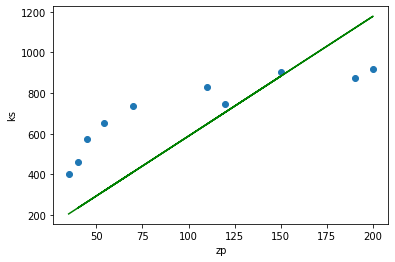

In [5]:
# С использованием формул
beta1 = np.sum(x * y) / np.sum(x * x)

print(f'beta1 = {beta1}\n')

# Матричный метод
X = x.reshape((n, 1))
Y = y.reshape((n, 1))
B = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))

print('Матричный способ')
print(B)

# Графики
plot_data(beta1)

### Задание 2

*Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).*

In [6]:
def mse(beta):
    """
    Вычисляет MSE для парной линейной регрессии без intercept.
    beta - коэффициент при признаке (slope).
    """
    return np.sum(np.power(y - beta * x, 2)) / n

In [7]:
def mse_der(beta):
    """
    Вычисляет производную MSE для парной линейной регрессии без intercept.
    beta - коэффициент при признаке (slope).
    """
    return -2 * np.sum(x * (y - beta * x)) / n

In [8]:
# Начальное приближение для коэффициента
beta = 0.1

# Скорость градиентного спуска
alpha = 1e-6

# Точность
eps = 1e-5
mse_diff = 1

# Счетчик
i = 0

while(mse_diff > eps):
    mse_prev = mse(beta)
    if i % 100 == 0:
        print(f'Итерация {i}: beta = {beta}, mse = {mse_prev}')
        
    beta -= alpha * mse_der(beta)
    mse_diff = np.abs(mse_prev - mse(beta))
    i += 1

print('\nРезультат')
print(f'Итерация {i}: beta = {beta}, mse = {mse(beta)}')

Итерация 0: beta = 0.1, mse = 518336.3
Итерация 100: beta = 5.535619010156249, mse = 58245.25625
Итерация 200: beta = 5.868151591796872, mse = 56523.33125

Результат
Итерация 272: beta = 5.886921870703124, mse = 56516.98125


Коэффициент примерно совпадает с результатом, полученным с использованием точных формул.

**Ответ:** $y = 5.887 x.$

### Задание 3

*Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).*

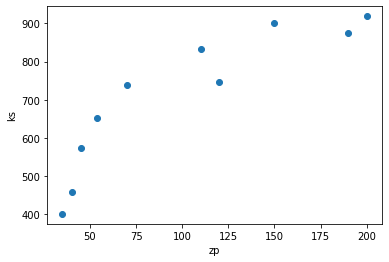

In [9]:
plot_data()

По виду графика можно предположить, что за начальное приближение для intercept можно принять значение 400. 

In [10]:
def mse(beta0, beta1):
    """
    Вычисляет MSE для парной линейной регрессии с intercept.
    beta0 - свободный коэффициент (intercept),
    beta1 - коэффициент при признаке (slope).
    """
    return np.sum(np.power(y - beta0 - beta1 * x, 2)) / n

In [11]:
def mse_der_intercept(beta0, beta1):
    """
    Вычисляет частную производную MSE по intercept для парной линейной регрессии.
    beta0 - свободный коэффициент (intercept),
    beta1 - коэффициент при признаке (slope).
    """
    return -2 * np.sum((y - beta0 - beta1 * x)) / n

In [12]:
def mse_der_slope(beta0, beta1):
    """
    Вычисляет частную производную MSE по slope для парной линейной регрессии.
    beta0 - свободный коэффициент (intercept),
    beta1 - коэффициент при признаке (slope).
    """
    return -2 * np.sum(x * (y - beta0 - beta1 * x)) / n

In [13]:
# Начальное приближение для коэффициентов
beta0 = 400
beta1 = 1

# Скорость градиентного спуска
alpha = 1e-7

# Точность
eps = 1e-6
mse_diff = 1

# Счетчик
i = 0

while(mse_diff > eps):
    mse_prev = mse(beta0, beta1)
    if i % 1000 == 0:
        print(f'Итерация {i}: beta0 = {beta0}, beta1 = {beta1}, mse = {mse_prev}')
    
    beta0_prev = beta0
    beta1_prev = beta1
    
    beta0 = beta0_prev - alpha * mse_der_intercept(beta0_prev, beta1_prev)
    beta1 = beta1_prev - alpha * mse_der_slope(beta0_prev, beta1_prev)
    mse_diff = np.abs(mse_prev - mse(beta0, beta1))
    i += 1

print('\nРезультат')
print(f'Итерация {i}: beta0 = {beta0}, beta1 = {beta1}, mse = {mse(beta0, beta1)}')

Итерация 0: beta0 = 400, beta1 = 1, mse = 59120.1
Итерация 1000: beta0 = 400.01565378148626, beta1 = 2.8223518987500014, mse = 7174.334375
Итерация 2000: beta0 = 400.0187435902121, beta1 = 2.9377602650488273, mse = 6965.89453125

Результат
Итерация 2165: beta0 = 400.0191342281825, beta1 = 2.940612104775391, mse = 6965.3859375


Полученная модель

$$y = 400.019 + 2.94 x.$$

Построим графики.

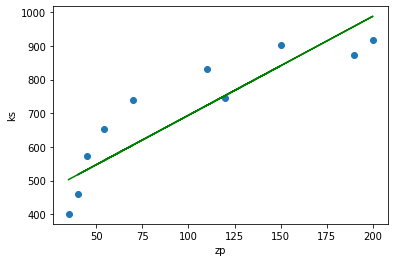

In [14]:
# Графики
plot_data(beta1, beta0)

Коэффициенты отличаются от тех, которые были получены с использованием точных формул. Возможно это связано с видом минимизируемой функции ошибок - есть очень пологий участок с минимальным значением, к которому сходится алгоритм при различных начальных значениях.

<IPython.core.display.Javascript object>


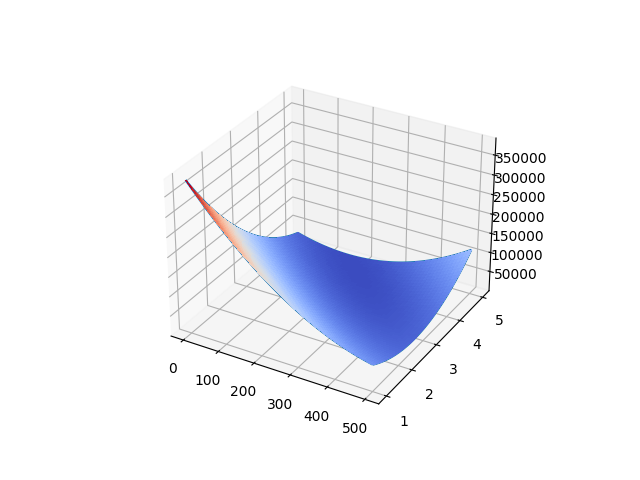

In [15]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xx = np.linspace(1, 500, 100)
yy = np.linspace(1, 5, 100)

X, Y = np.meshgrid(xx, yy)

xx_len = len(xx)
Z = np.ones((xx_len, xx_len))
for i in range(xx_len):
    for j in range(xx_len):
        Z[i, j] = mse(xx[i], yy[j])

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

**Ответ:** $y = 400.019 + 2.94 x.$